## Aufgabe

Führen Sie die PCA *auf Basis von Eigenvektoren* für das Beispiel Kalorien und Bewertung *in normierter Form* durch. Stellen Sie die einzelnen Schritte wie oben dar. Hilfe zum Vorgehen:

1. Wie gewohnt die Daten einlesen, dann aber mit `preprocessing.scale` die Daten normieren.
2. Die normierten Daten von *calories* und *rating* mit ihren Eigenvektoren darstellen.
3. Mit einer `PCA` und `fit` prüfen, ob die Eigenvektoren aus 2 stimmen (und sich im Graphen nicht durch die Richtungen irritieren lassen :-)

# Abhängigkeiten

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Einlesen und normieren

In [8]:
data = pd.read_csv('./Vorlesungsunterlagen/Daten/cereal.csv')
data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


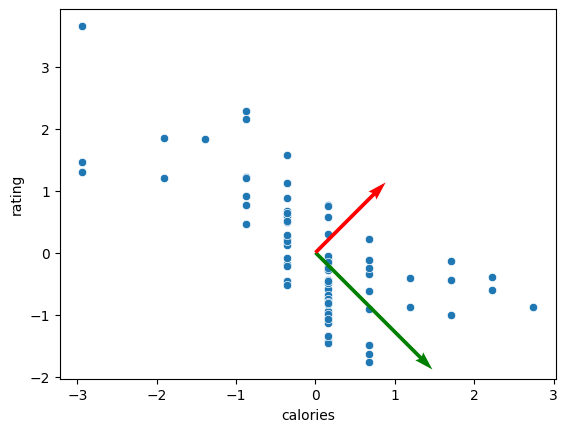

In [9]:
normalized_data = pd.DataFrame(preprocessing.scale(data[['calories', 'rating']]), columns=['calories', 'rating'])
eigenvalues, eigenvectors = np.linalg.eig(normalized_data. cov())

calories_mean = normalized_data['calories'].mean()
rating_mean = normalized_data[ 'rating'].mean()

figure = sns.scatterplot(
    data=normalized_data, x='calories',
    y='rating'
)

figure.quiver(calories_mean, rating_mean, *eigenvectors[:,0], color=['g'], scale=3) 
figure.quiver(calories_mean, rating_mean, *eigenvectors[:,1], color=['r'], scale=5)